In [ ]:
# gerardo Herrera... random forest (500 arboles) con 28k instacias de normal y recovering y 24 sensores

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import time
# Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install lightgbm
!pip install catboost

import datetime
import lightgbm as lgb
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn import linear_model
from tqdm import tqdm_notebook
from catboost import CatBoostClassifier



     |████████████████████████████████| 66.2MB 61kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# sensor = pd.read_csv('../input/sensor.csv')
# sensor = pd.read_csv('../input/vombas/sensor_procesado.csv')
#sensor = pd.read_csv('dataset_sensor_procesado.csv')
#sensor = pd.read_csv('../input/bombas-sensores-conocidos/sensor2.csv')
#sensor = pd.read_csv('../input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv')
#sensor.drop(['Unnamed: 0'], axis=1, inplace=True)

sensor = pd.read_csv('/content/drive/My Drive/datasets/sensor2-ordenado_status_sin_broken_balanced_28k.csv')

In [ ]:
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,NaN,177.951400000000007,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,NaN,178.530100000000004,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,NaN,177662.000000000000000,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,NaN,175.057899999999989,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,NaN,173.321799999999996,NORMAL


In [ ]:
#sensor.drop(['sensor_15'], axis=1, inplace=True)
sensor.drop(['timestamp'], axis=1, inplace=True)

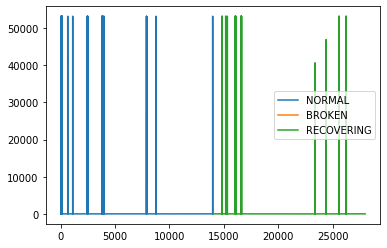

In [ ]:
# lineA DE LOS 22K INSTANCIAS
plt.plot(sensor.loc[sensor['machine_status'] == 'NORMAL', 'sensor_02'], label='NORMAL')
plt.plot(sensor.loc[sensor['machine_status'] == 'BROKEN', 'sensor_02'], label='BROKEN')
plt.plot(sensor.loc[sensor['machine_status'] == 'RECOVERING', 'sensor_02'], label='RECOVERING')
plt.legend()

In [ ]:
cleanup_nums = {"machine_status":     {"NORMAL": 0, "RECOVERING": 1,"BROKEN": 2}}

In [ ]:
sensor.replace(cleanup_nums, inplace=True)
sensor.head(30)

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,NaN,177.951400000000007,0
1,1,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,NaN,178.530100000000004,0
2,2,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,NaN,177662.000000000000000,0
3,3,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,NaN,175.057899999999989,0
4,4,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,NaN,173.321799999999996,0
5,5,2.453588,47.092010000000002,53.168399999999998,46.397567749023402,637.615699999999947,49.370510000000003,418.904899999999998,461.894799999999975,461.928899999999999,2.507935,663.496200000000044,398.642800000000022,872.497299999999996,498.406400000000019,974.684700000000021,739.203600000000051,846.461699999999951,429.694500000000005,794.577400000000011,696.759300000000053,977.604100000000017,50.636569999999999,NaN,172.743099999999998,0
6,6,2.455556,47.048609999999996,53.168399810790994,46.397567749023402,633.333300000000008,49.571460000000002,420.332400000000007,464.240200000000016,467.514599999999973,2.598702,667.475099999999998,401.184700000000021,882.716400000000021,500.494399999999985,981.290799999999990,740.951699999999960,853.964699999999993,458.362300000000005,800.564200000000028,686.111099999999965,953.124900000000025,51.793979999999998,NaN,171.296300000000002,0
7,7,2.449653,47.135410000000000,53.168399810790994,46.397567749023402,630.671299999999974,49.327320000000000,417.552000000000021,462.456299999999999,463.893599999999992,2.533115,662.996700000000033,395.294600000000003,864.610300000000052,496.421800000000019,966.209100000000035,741.459299999999985,834.623299999999972,476.126199999999983,785.887899999999945,664.814799999999991,919.270800000000008,52.662040000000012,NaN,169.270800000000008,0
8,8,2.463426,47.092010000000002,53.168399810790994,46.397567749023402,631.944399999999973,50.287950000000002,422.077699999999993,463.498800000000017,461546.000000

In [ ]:
for col in sensor.columns[1:-1]:
    sensor[col] = sensor[col].fillna(sensor[col].mean())

In [ ]:
# bosque aleatorio

In [ ]:
sensor.fillna(sensor.mean(), inplace=True)

In [ ]:
sensor.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,788.498699999999985,701.388900000000035,924.999900000000025,43.692129999999999,481.174107169096658,177.951400000000007,0
1,1,2.465394,47.092010000000002,53.211799999999997,46.310760000000002,634375.000000000000000,47.524220000000000,419.574700000000007,461.878100000000018,466.328399999999988,2.565284,665.399300000000039,398.986199999999997,880.000099999999975,498.892600000000016,975.940900000000056,741.715100000000007,848.070799999999963,429.037699999999973,804.123999999999796,682.870400000000018,965.624900000000025,44.560180000000003,481.174107169096658,178.530100000000004,0
2,2,2.444734,47.352429999999998,53.211799999999997,46.397570000000002,638.888900000000035,48.177230000000002,420848.000000000000000,462.779800000000023,459.636399999999981,2.500062,666.223399999999970,399.941800000000001,880.423700000000053,501.361699999999985,982.734199999999987,740.803099999999972,849.899700000000053,454.238999999999976,790.801600000000008,690.740699999999947,898.437400000000025,46.006940000000000,481.174107169096658,177662.000000000000000,0
3,3,2.460474,47.092010000000002,53.168399999999998,46.397567749023402,628125.000000000000000,48.656070000000000,420.749399999999980,462898.000000000000000,460.885800000000017,2.509521,666.011399999999981,399.104600000000005,878.891700000000014,499043.000000000000000,977752.000000000000000,739.272199999999998,847.757899999999950,474.873100000000022,792.879099999999994,686.111099999999965,956.249900000000025,47.743060000000000,481.174107169096658,175.057899999999989,0
4,4,2.445718,47.135410000000000,53.211799999999997,46.397567749023402,636.458300000000008,49.062980000000003,419.892600000000016,461.490599999999972,468.220599999999990,2.604785,663.211099999999988,400.542599999999993,882.587400000000002,498.538299999999992,979.575500000000034,737.603299999999990,846.918199999999956,408.815899999999999,786064.000000000000000,693.055500000000052,935.937400000000025,49.189820000000012,481.174107169096658,173.321799999999996,0


In [ ]:
print(sensor.shape)


(28002, 26)


In [ ]:
# Encontrar características importantes en Scikit-learn

# from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
#clf.fit(X_train,y_train)

In [ ]:
# no correr
#import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=sensor.columns[19:27]).sort_values(ascending=False)
#print(feature_imp)

#Visualización
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
# Creating a bar plot
#sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
#plt.ylabel('Features')
#plt.title("Visualizing Important Features")
#plt.legend()
#plt.show()

In [ ]:

X=sensor[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51']]  # Features
#y=sensor['target']  # Labels
y=sensor['machine_status']  # Labels

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test


from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=500)

start = time.time()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#predicciones del item 17156 q es 1
clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Training time: 13.407578945159912s
Accuracy: 1.0


array([1])

In [ ]:
#predicciones
clf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


array([1])

In [ ]:
#predicciones
clf.predict([[0.0,53.55902,52.77777,43.402774810790994,204.72509765625,3.7302410000000004,404.9974,450.2004,454.0266,2.4481040000000003,651.1287,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [ ]:
# Extract single tree
estimator = clf.estimators_[5]

In [ ]:
#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51'],
#                class_names = [ 'machine_status'],
 #               rounded = True, proportion = False, 
 #               precision = 2, filled = True)

In [ ]:
# validacion cruzada
# https://jamesrledoux.com/code/k_fold_cross_validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
start1 = time.time()
model = RandomForestClassifier(random_state=1)
cv = cross_validate(model, X, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

[0.99464477 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.85642857]
0.9850716325802009
Training time: 28.07333517074585s


In [ ]:
#https://stackoverflow.com/questions/20662023/save-python-random-forest-model-to-file

[[2792    0]
 [   0 2809]]
[0.99393074 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.88071429]
0.9874288009384402
Training time: 139.9744303226471s
[[2792    0]
 [   0 2809]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2792
           1       1.00      1.00      1.00      2809

    accuracy                           1.00      5601
   macro avg       1.00      1.00      1.00      5601
weighted avg       1.00      1.00      1.00      5601



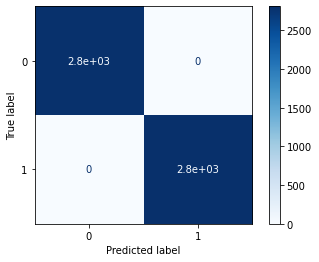

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=500)

cv = cross_validate(model, X, y, cv=10)
print(confusion_matrix(y_test,y_pred))
print(cv['test_score'])
print(cv['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

[[2792    0]
 [   0 2809]]
precision_macro_score:
[0.9975142  0.99964311 1.         1.         1.         1.
 1.         1.         1.         0.92225241]
0.9919409723151702
test_score:
[0.99393074 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.88857143]
0.9882145152241545
recall:
[0.995      0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9992857652697053
f1score:
[0.99677535 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.89788054]
0.9894298873484532
Training time: 565.7100138664246s
[[2792    0]
 [   0 2809]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2792
           1       1.00      1.00      1.00      2809

    accuracy                           1.00      5601
   macro avg       1.00      1.00      1.00      5601
weighted avg       1.00      1.00      1.00      5601



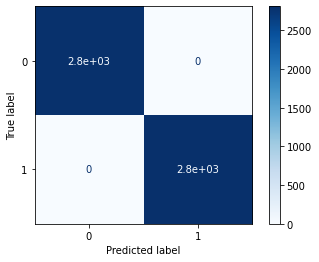

In [ ]:
# version with multi scroring
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=500)

cv = cross_validate(model, X, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')
f1=cross_validate(model, X,y, cv=10, scoring ='f1')
recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))
print(f"precision_macro_score:")
print(pre_score['test_score'])
print(pre_score['test_score'].mean())
print(f"test_score:")
print(cv['test_score'])
print(cv['test_score'].mean())
print(f"recall:")
print(recall_score['test_score'])
print(recall_score['test_score'].mean())
print(f"f1score:")
print(f1['test_score'])
print(f1['test_score'].mean())
stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

[[2792    0]
 [   0 2809]]
multi_metric_scores:
{'fit_time': array([13.70309615, 13.68394828, 13.90837884, 13.79051661, 13.67019773,
       14.14955759, 14.21738338, 14.35204458, 14.29634309, 13.40078807]), 'score_time': array([0.12184381, 0.11684489, 0.1176846 , 0.12963891, 0.11836505,
       0.11818528, 0.12190866, 0.12092113, 0.12525129, 0.11808348]), 'test_accuracy': array([0.99393074, 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.82964286]), 'test_f1': array([0.99389148, 0.99964298, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.85426214]), 'test_recall': array([0.98785714, 0.99928622, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99857143]), 'test_precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.74639616])}
Training time: 295.0970540046692s
[[27

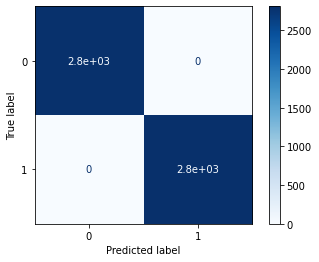

accuracy:
[0.99393074 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.82964286]
0.9823216580812975
precision:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.74639616]
0.9746396155899626
recall:
[0.98785714 0.99928622 1.         1.         1.         1.
 1.         1.         1.         0.99857143]
0.9985714795554197
f1:
[0.99389148 0.99964298 1.         1.         1.         1.
 1.         1.         1.         0.85426214]
0.9847796613479666
--------
matriz de confusion:
TN=2792, FP=0 
FN=0, TP=2809 
--------
matriz de confusion %:
TN=49.84824138546688, FP=0.0 
FN=0.0, TP=50.15175861453312 
--------
accuracy1=1.0
--------
reca1=1.0
--------
pre1=1.0
--------
f1score=1.0


In [ ]:
# version with multi scroring mejorada
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

start1 = time.time()
#model = RandomForestClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=500)

#GH
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#GH

cv = cross_validate(model, X, y, cv=10)
#recall_score=cross_validation.cross_val_score(clf, X,y, cv=10, scoring ='recall')
#recall_score=cross_val_score(model, X,y, cv=10, scoring ='recall')

#scoring = ['neg_mean_absolute_error','r2']

scores=cross_validate(model, X,y, cv=10, scoring = ['accuracy','f1','recall','precision'],return_train_score=False)
#recall_score=cross_validate(model, X,y, cv=10, scoring ='recall')
#pre_score=cross_validate(model, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))

print(f"multi_metric_scores:")
#print(scores['test_score'])
print(scores)
#print(scores['test_score'].mean())

#print(scores.mean())

#print(f"precision_macro_score:")
#print(pre_score['test_score'])
#print(pre_score['test_score'].mean())

#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())

#print(f"recall:")
#print(recall_score['test_score'])
#print(recall_score['test_score'].mean())

#print(f"f1score:")
#print(f1['test_score'])
#print(f1['test_score'].mean())

stop1 = time.time()
print(f"Training time: {stop1 - start1}s")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#plot_confusion_matrix(clf, X_test, y_test)  
# plot_confusion_matrix(clf, X_test, y_test)  
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

CM = confusion_matrix(y_test, y_pred)
print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
# create RF

In [ ]:
# save
joblib.dump(clf, "my_random_forest.joblib")

['my_random_forest.joblib']

In [ ]:
# load
loaded_rf = joblib.load("my_random_forest.joblib")

In [ ]:
#predicciones
#clf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
#predicciones
loaded_rf.predict([[0.0,53.55902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [ ]:
# 1 es recovering
loaded_rf.predict([[0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [ ]:
# 0 es recovering
loaded_rf.predict([[2.465394,47.092009999999995,53.2118,46.310759999999995,634375,47.52422,419.5747,461.8781,466.3284,2.565284,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [ ]:
# 2 es broken
loaded_rf.predict([[2.258796,47.26563,52.73437,43.4461784362793,200.11573791503898,43.62322,420.3359,463.0843,462.6495,2.539193,665.5446,399166,880.9252,498.6224,997.6364,719.8438,867.5176,551.6367,1154405,655.5555,1024479,35.01157,246.2384,257.5231]])

array([1])

No handles with labels found to put in legend.


sensor_50    0.232008614527387
sensor_28    0.155139301713169
sensor_26    0.131795898646431
sensor_25    0.110861851269088
sensor_44    0.097505361456306
sensor_22    0.081278757345340
sensor_31    0.045465172383412
sensor_27    0.031709722277840
sensor_51    0.030814483227659
sensor_20    0.016924944332720
sensor_16    0.013014833663071
sensor_21    0.011633081219379
sensor_14    0.011314503461296
sensor_00    0.010804480943123
sensor_19    0.006824543819885
sensor_23    0.005805154043774
sensor_18    0.003030557161612
sensor_02    0.001205321192704
sensor_17    0.000589871703175
sensor_11    0.000555745724755
sensor_03    0.000537576783007
sensor_01    0.000515291133954
sensor_04    0.000410336591203
sensor_30    0.000254595379709
dtype: float64


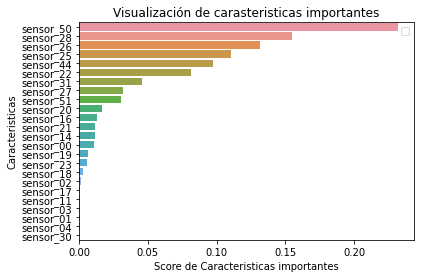

<Figure size 432x288 with 0 Axes>

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html

import pandas as pd
#feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
#feature_imp = pd.Series(clf.feature_importances_,index=X.columns[1:8]).sort_values(ascending=False)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns[0:24]).sort_values(ascending=False)
print(feature_imp)

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
#plt.xlabel('Feature Importance Score')
plt.xlabel('Score de Caracteristicas importantes')
#plt.ylabel('Features')
plt.ylabel('Caracteristicas')
#plt.title("Visualizing Important Features")
plt.title("Visualización de carasteristicas importantes")
plt.legend()
plt.show()

#plt.savefig('destination_path.eps', format='eps' , dpi=1000)

plt.savefig('myimage.svg', format='svg', dpi=1200)

In [ ]:
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c